<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 9
</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

# SymPy

## Paketeinbindung

Hallo Alex $\alpha = \sqrt(3)$

In [1]:
Pkg.add("SymPy")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [1]:
α = π

π = 3.1415926535897...

In [123]:
# import package
using SymPy

## Symbole und Funktionen

In [124]:
# define symbols and give some attributes to make calculations easier
# for nicer output, we can use latex variable names in the string identifier of a symbol
x = symbols("x")

x

In [113]:
typeof(x)

SymPy.Sym

In [9]:
f(x)=exp(-x^2/2)

f (generic function with 1 method)

In [10]:
f(x)

   2 
 -x  
 ----
  2  
e    

In [115]:
typeof(f(x))

SymPy.Sym

In [116]:
f(1)

0.6065306597126334

In [117]:
subs(f(x),x,1)

 -1/2
e    

In [118]:
ex = exp(-x^2/2)

   2 
 -x  
 ----
  2  
e    

In [119]:
typeof(ex)

SymPy.Sym

In [120]:
ex(1)

 -1/2
e    

In [121]:
N(ex(1))

0.6065306597126334

## Polynome und elementare Algebra

In [15]:
(x+1) + (x+2) + (x+3)

3*x + 6

In [16]:
(x+1)*(x-1)

(x - 1)*(x + 1)

In [17]:
simplify((x+1)*(x-1))

 2    
x  - 1

In [18]:
simplify((x+1)*(x-2))

(x - 2)*(x + 1)

In [19]:
expand((x+1)*(x-2))

 2        
x  - x - 2

In [20]:
factor(x^2+2x+1)

       2
(x + 1) 

In [21]:
sin(x)^2+cos(x)^2

   2         2   
sin (x) + cos (x)

In [22]:
simplify(sin(x)^2+cos(x)^2)

1

## Gleichungen lösen

**Nullstellen**

In [23]:
p = expand( (x-1)^2*(x-2)*(x-3)*(x^2+x+1))

 6      5       4      3      2           
x  - 6*x  + 11*x  - 7*x  + 6*x  - 11*x + 6

In [24]:
factor(p)

                       2 / 2        \
(x - 3)*(x - 2)*(x - 1) *\x  + x + 1/

In [25]:
# roots and their multiplicities
polyroots(p)

Dict{Any,Any} with 5 entries:
  1                  => 2
  -1/2 - sqrt(3)*I/2 => 1
  3                  => 1
  -1/2 + sqrt(3)*I/2 => 1
  2                  => 1

**Gleichungssystem**

\begin{eqnarray}
 a & + b & -1 & = & 0 \\
 a & - b &    & = & 0
\end{eqnarray}

In [26]:
a,b = symbols("a, b")
eqs = [a + b - 1, a - b]

2-element Array{SymPy.Sym,1}
[a + b - 1]
[         ]
[  a - b  ]

In [27]:
solve(eqs)

Dict{SymPy.Sym,SymPy.Sym} with 2 entries:
  a => 1/2
  b => 1/2

<hr>

## Ableitungen

In [28]:
fun = x^2+2*x^3

   3    2
2*x  + x 

In [29]:
diff(fun)

   2      
6*x  + 2*x

In [30]:
more_fun = exp(exp(x))

 / x\
 \e /
e    

In [31]:
diff(more_fun)

    / x\
 x  \e /
e *e    

In [32]:
diff(more_fun, x, 2)

             / x\
/ x    \  x  \e /
\e  + 1/*e *e    

## Integration

In [125]:
tri = cos(x)-sin(x)

-sin(x) + cos(x)

In [126]:
integrate(tri, x)

sin(x) + cos(x)

In [127]:
integrate( x^2 + (x-2)*(x+3), x)

   3    2      
2*x    x       
---- + -- - 6*x
 3     2       

In [128]:
integrate(x/(x^2+1), x)

   / 2    \
log\x  + 1/
-----------
     2     

Integration über definierten Bereich, d.h.

\begin{equation}
  \int_a^b f(x) dx
\end{equation}

In [129]:
integrate(x^2, (x, 0, 1))                   

1/3

**Beispiel**: Bestimmung der Normierungskonstante der Normalverteilung 

In [33]:
sigma, mu = symbols("sigma, mu", positive = true)

(sigma,mu)

In [34]:
lamb = symbols("lambda", positive = true)

lambda

In [37]:
# define function to be integrated
g = exp(- 1 / (2 * sigma^2) * (x - mu)^2)

           2 
 -(-mu + x)  
 ------------
          2  
   2*sigma   
e            

In [38]:
# direct integration is sometimes possible along with a simplification of the result
simplify(integrate(g, x, -oo, oo))

  ___   ____      
\/ 2 *\/ pi *sigma

## Limits

In [39]:
# another possibility is to integrate up to a cut off and take this limit to infinity
C = integrate(g, x, -lamb, lamb)

                      /   ___                \                         /  ___ 
  ___   ____          |-\/ 2 *(-lambda - mu) |     ___   ____          |\/ 2 *
\/ 2 *\/ pi *sigma*erf|----------------------|   \/ 2 *\/ pi *sigma*erf|------
                      \       2*sigma        /                         \      
---------------------------------------------- + -----------------------------
                      2                                               2       

             \
(lambda - mu)|
-------------|
2*sigma      /
--------------
              

In [40]:
limit(C, lamb, oo)

  ___   ____      
\/ 2 *\/ pi *sigma

<hr>

## Matrizen

In [41]:
x = symbols("x")
a = [x 1; 1 x]

2x2 Array{SymPy.Sym,2}
[x  1]
[    ]
[1  x]

In [42]:
det(a)

  /    1\
x*|x - -|
  \    x/

In [43]:
a, b, c, d = symbols("a, b, c, d")

(a,b,c,d)

In [44]:
A = [a b; c d]

2x2 Array{SymPy.Sym,2}
[a  b]
[    ]
[c  d]

In [45]:
B = transpose(A)

2x2 Array{SymPy.Sym,2}
[a  c]
[    ]
[b  d]

In [46]:
B * A

2x2 Array{SymPy.Sym,2}
[  2    2            ]
[ a  + c    a*b + c*d]
[                    ]
[             2    2 ]
[a*b + c*d   b  + d  ]

In [47]:
B * A * B * A

2x2 Array{SymPy.Sym,2}
[  /  / 2    2\                \     /  / 2    2\                \    /  / 2  
[a*\a*\a  + c / + b*(a*b + c*d)/ + c*\c*\a  + c / + d*(a*b + c*d)/  b*\a*\a  +
[                                                                             
[  /                  / 2    2\\     /                  / 2    2\\    /       
[a*\a*(a*b + c*d) + b*\b  + d // + c*\c*(a*b + c*d) + d*\b  + d //  b*\a*(a*b 

  2\                \     /  / 2    2\                \]
 c / + b*(a*b + c*d)/ + d*\c*\a  + c / + d*(a*b + c*d)/]
                                                       ]
           / 2    2\\     /                  / 2    2\\]
+ c*d) + b*\b  + d // + d*\c*(a*b + c*d) + d*\b  + d //]

In [48]:
det(A)

  /    b*c\
a*|d - ---|
  \     a /

<hr>
# Quantenmechanik
**Kernel restart required**

In [1]:
using PyCall

In [2]:
@pyimport sympy as sym
@pyimport sympy.core as cr
@pyimport sympy.physics.quantum.spin as SymSpin
@pyimport sympy.physics.quantum as SymQuantum

sys:1: SymPyDeprecationWarning: 

C, including its class ClassRegistry, has been deprecated since SymPy
1.0. It will be last supported in SymPy version 1.0. Use direct
imports from the defining module instead. See
https://github.com/sympy/sympy/issues/9371 for more info.



In [5]:
j,m = sym.symbols("j, m")

(PyObject j,PyObject m)

In [6]:
j="1/2"

"1/2"

In [7]:
m="-1/2"

"-1/2"

In [12]:
ket = SymSpin.JzKet(j,m)

PyObject |1/2,-1/2>

In [13]:
bra = SymSpin.JzBra(j,m)

PyObject <1/2,-1/2|

In [20]:
cr.Mul(bra,ket)

PyObject <1/2,-1/2|*|1/2,-1/2>

In [21]:
down =  SymSpin.JzKet(j,m)

PyObject |1/2,-1/2>

In [22]:
up = SymSpin.JzKet(j,j)

PyObject |1/2,1/2>

In [23]:
state = cr.Add(up, down)

PyObject |1/2,-1/2> + |1/2,1/2>

In [17]:
state_dag = SymQuantum.Dagger(state)

PyObject <1/2,-1/2| + <1/2,1/2|

### Tensorprodukt

Den Tensor-Produkt Zustand $|a\rangle \otimes |b\rangle$ stellen wir dar als Vektor $(a, b)$.

In [126]:
state = [up, down]

2-element Array{PyCall.PyObject,1}:
 PyObject |1/2,1/2> 
 PyObject |1/2,-1/2>

In [127]:
function dagger(state)
    daggered = []
    for s in state
        push!(daggered, SymQuantum.Dagger(s))
    end
    return daggered
end

dagger (generic function with 1 method)

In [128]:
state_dag = dagger(state)

2-element Array{Any,1}:
 PyObject <1/2,1/2| 
 PyObject <1/2,-1/2|

Wir wollen das **innere Produkt** zweier Tensorprodukt-Zustände berechnen als
\begin{equation}
\left(\langle c| \otimes \langle d|\right)\left(|a\rangle \otimes |b\rangle\right) = 
\langle c|a\rangle \cdot \langle d|b\rangle
\end{equation}

In [129]:
function bra_ket(bra_state, ket_state)
    temp = []
    
    for (a, b) in zip(bra_state, ket_state)
        push!(temp, cr.Mul(a, b))
    end
  
    result = temp[1]
    for i in temp[2:end]
        result = cr.Mul(i, result)
    end
    
    result 
    return Float64(SymQuantum.qapply(result))
end

bra_ket (generic function with 1 method)

In [130]:
bra_ket(state_dag, state)

1.0

In [131]:
norm = sqrt(bra_ket(state_dag, state))

1.0

<hr/>

Wir wollen nun die **Dichtematrix** 

\begin{equation}
  \rho = |\psi\rangle\langle\psi|
\end{equation}  

betrachten.<br/>
Wir stellen fest, dass diese vollständig durch die Angabe des Kets $|\psi\rangle$ definiert ist.<br/>


<br/>
<hr/>
<br/>

Betrachten wir als **Beispiel** den Zustand

\begin{eqnarray}
  |\psi\rangle & = & \cos(\phi) \cdot |\uparrow\downarrow\rangle + \sin(\phi) \cdot |\downarrow\uparrow\rangle \\
  & = & \cos(\phi) \cdot |\uparrow\rangle_A\otimes|\downarrow\rangle_B + \sin(\phi) \cdot |\downarrow\rangle_A\otimes|\uparrow\rangle_B
\end{eqnarray}

<br/>
<hr/>
<br/>


In **expliziter Form** wollen wir also die Matrix

\begin{equation*}
  \left(
  \begin{matrix}
   \langle\uparrow\downarrow|\rho |\uparrow\downarrow\rangle & \langle\uparrow\downarrow| \rho |\downarrow\uparrow\rangle \\
   \langle\downarrow\uparrow|\rho |\uparrow\downarrow\rangle & \langle \downarrow\uparrow| \rho |\downarrow\uparrow\rangle
  \end{matrix}
  \right)
\end{equation*}

berechnen.

**Erwartungswerte** der Form
\begin{equation}
  \langle \alpha|\rho|\beta\rangle 
\end{equation}  
können wir mit Hilfe des oben definierte inneren Produkts berechnen als
\begin{equation}
  \langle \alpha|\psi\rangle\langle\psi|\beta\rangle
\end{equation}  
<hr/>

In [132]:
# psi
xs = linspace(0., 2*pi, 9)

for phi in xs
    c, s = cos(phi), sin(phi)
    ud = [cr.Mul(c, up), down]
    du = [cr.Mul(s, down), up]
    println("phi = ", phi/pi)
    println("ud = ", ud)
    println("du = ", du)
end

phi = 0.0
ud = [PyObject 1.0*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject 0,PyObject |1/2,1/2>]
phi = 0.25
ud = [PyObject 0.707106781186548*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject 0.707106781186547*|1/2,-1/2>,PyObject |1/2,1/2>]
phi = 0.5
ud = [PyObject 6.12323399573677e-17*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject 1.0*|1/2,-1/2>,PyObject |1/2,1/2>]
phi = 0.75
ud = [PyObject -0.707106781186547*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject 0.707106781186548*|1/2,-1/2>,PyObject |1/2,1/2>]
phi = 1.0
ud = [PyObject -1.0*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject 1.22464679914735e-16*|1/2,-1/2>,PyObject |1/2,1/2>]
phi = 1.25
ud = [PyObject -0.707106781186548*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject -0.707106781186547*|1/2,-1/2>,PyObject |1/2,1/2>]
phi = 1.5
ud = [PyObject -1.83697019872103e-16*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject -1.0*|1/2,-1/2>,PyObject |1/2,1/2>]
phi = 1.75
ud = [PyObject 0.707106781186547*|1/2,1/2>,PyObject |1/2,-1/2>]
du = [PyObject -0.707106

In [146]:
# Dichtematrix
xs = linspace(0., 2*pi, 9)

## for phi in xs
phi = 0.25*pi

    c, s = cos(phi), sin(phi)
    ud = [cr.Mul(c, up), down]
    du = [cr.Mul(s, down), up]

    density_matrix = zeros(2, 2)
    
    # <ud| rho | ud> 
    alpha = dagger([up,down])
    beta = [up,down]
    density_matrix[1,1] = (bra_ket(alpha, ud) + bra_ket(alpha, du))* (bra_ket(dagger(ud), beta) + bra_ket(dagger(du), beta)) 
    

    # <ud| rho | du> 
    alpha = dagger([up,down])
    beta = [down,up]
    density_matrix[1,2] = (bra_ket(alpha, ud) + bra_ket(alpha, du))* (bra_ket(dagger(ud), beta) + bra_ket(dagger(du), beta)) 



    # <du| rho | ud> 
    alpha = dagger([down,up])
    beta = [up,down]
    density_matrix[2,1] = (bra_ket(alpha, ud) + bra_ket(alpha, du))* (bra_ket(dagger(ud), beta) + bra_ket(dagger(du), beta)) 



    # <du| rho | du> 
    alpha = dagger([down,up])
    beta = [down,up]
    density_matrix[2,2] = (bra_ket(alpha, ud) + bra_ket(alpha, du))* (bra_ket(dagger(ud), beta) + bra_ket(dagger(du), beta)) 


    println("density matrix is given by ") 
    density_matrix

## end

density matrix is given by 


2x2 Array{Float64,2}:
 0.5  0.5
 0.5  0.5

 <br/>
<hr/>
<br/>

Für diesen Zustand wollen wir die **reduzierte Dichtematix $\rho_A$** ausrechnen

\begin{equation}
  \rho_A = \sum_{|\phi\rangle \in \mathcal{H}_B} \langle\phi| \rho |\phi\rangle
\end{equation}



<br/>
<hr/>
<br/>

**Erwartungswerte** der Form
\begin{equation}
  \langle \alpha|\rho|\beta\rangle 
\end{equation}  
können wir wieder mit Hilfe des oben definierte inneren Produkts berechnen als
\begin{equation}
  \langle \alpha|\psi\rangle\langle\psi|\beta\rangle
\end{equation}  

In [59]:
xs = linspace(0., 2*pi, 200)
y_values = Float64[]

for alpha in xs
    c, s = cos(alpha), sin(alpha)
    ud = [cr.Mul(c, up), cr.Mul(c, down)]
    du = [cr.Mul(s, down), cr.Mul(s, up)]

    reduced_density_matrix = zeros(2, 2)
    
    for (i, left) in enumerate([up, down])
        for (j, right) in enumerate([up, down])
            for (k, second) in enumerate([up, down])
                # rechte Seite 
                right_state = [right, second]
                
                ket_result = 0.
                ket_result += bra_ket(dagger(ud), right_state)
                ket_result += bra_ket(dagger(du), right_state)
                
                # linke Seite
                left_state = dagger([left, second])

                bra_result = 0.
                bra_result += bra_ket(left_state, ud)
                bra_result += bra_ket(left_state, du)
                
                reduced_density_matrix[i, j] += bra_result * ket_result
            end
        end
    end
    entropy = -1*trace( reduced_density_matrix * logm(reduced_density_matrix) )
    push!(y_values, entropy)
end

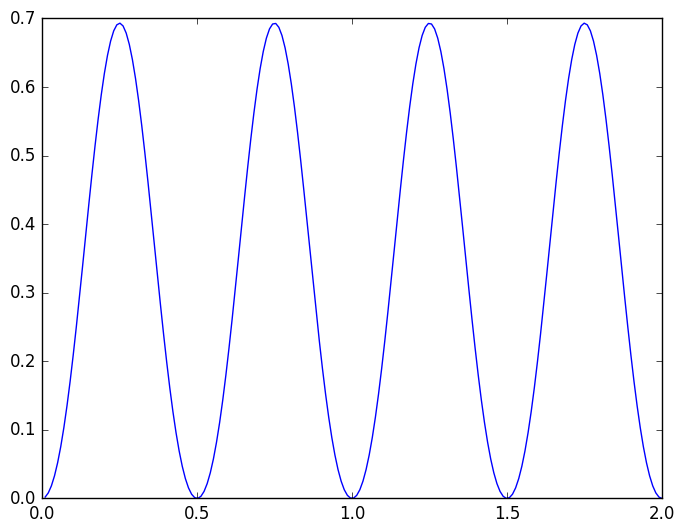

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3237b6590>

In [61]:
import PyPlot
PyPlot.plot(xs/pi, y_values)